# 컨볼루션 신경망(CNN)

* 참고자료 : https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

http://neuralnetworksanddeeplearning.com/chap1.html<br>
https://thebook.io/006796/ch01/02/01_01/<br>
https://www.hackerearth.com/blog/developers/object-detection-for-self-driving-cars/

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import os
import tensorflow as tf

seed=0
np.random.seed(seed)
tf.random.set_seed(3)

#데이터불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#정규화
X_train = X_train.reshape(X_train.shape[0], 28,28,1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 28,28,1).astype('float32')/255

Y_train = to_categorical(Y_train) 
Y_test = to_categorical(Y_test)

In [8]:
#컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1),
                 activation ='relu'))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25)) #정보의 25%꺼버린다
model.add(Flatten()) #1차원
model.add(Dense(128, activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation ='softmax'))# 숫자0-9까지 10개 숫자

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [9]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))



Epoch 1: val_loss improved from inf to 0.06263, saving model to ./model\01-0.0626.hdf5

Epoch 2: val_loss improved from 0.06263 to 0.04293, saving model to ./model\02-0.0429.hdf5

Epoch 3: val_loss improved from 0.04293 to 0.03483, saving model to ./model\03-0.0348.hdf5

Epoch 4: val_loss improved from 0.03483 to 0.03162, saving model to ./model\04-0.0316.hdf5

Epoch 5: val_loss did not improve from 0.03162

Epoch 6: val_loss improved from 0.03162 to 0.02797, saving model to ./model\06-0.0280.hdf5

Epoch 7: val_loss improved from 0.02797 to 0.02593, saving model to ./model\07-0.0259.hdf5

Epoch 8: val_loss did not improve from 0.02593

Epoch 9: val_loss did not improve from 0.02593

Epoch 10: val_loss did not improve from 0.02593

Epoch 11: val_loss did not improve from 0.02593

Epoch 12: val_loss did not improve from 0.02593

Epoch 13: val_loss did not improve from 0.02593

Epoch 14: val_loss improved from 0.02593 to 0.02557, saving model to ./model\14-0.0256.hdf5

Epoch 15: val_loss

In [10]:
#테스트 셋의 오차
y_vloss = history.history['val_loss']
#학습셋의 오차
y_loss = history.history['loss']

In [ ]:
#그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

#그래프에 그리드를 주고 레이블 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

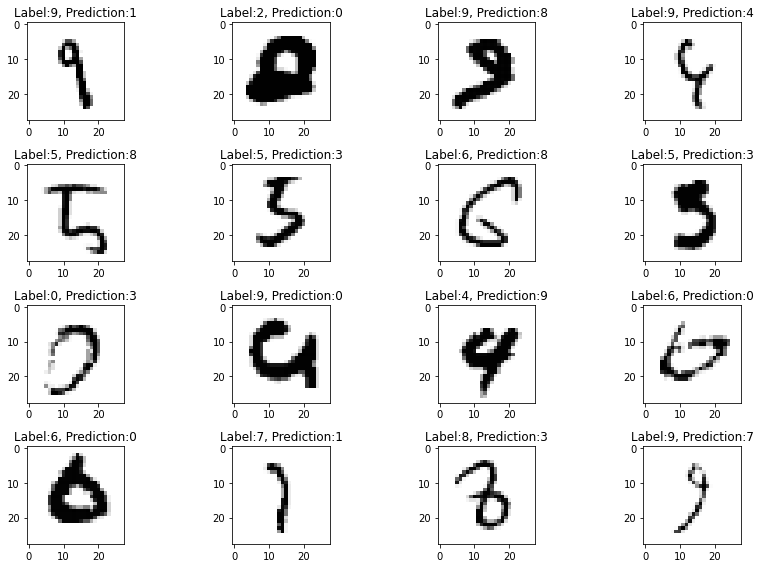

In [11]:
# 잘못예측한거 뭔지 찾아봄
import random
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(Y_test, axis=1)

wrong_result = []

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)

samples = random.choices(population=wrong_result, k=16)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(X_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()